In [2]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Load the dataset
df=pd.read_csv('Mall_Customers.csv')

In [4]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
# Checking number of missing Values
print("\nMissing values in each columns:")
print(df.isnull().sum())


Missing values in each columns:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
# Display the summary of the dataset
print("\nDataset Summary")
print(df.info())


Dataset Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [7]:
# Clean the dataset by dropping irrelevant information
df.drop(['CustomerID'], axis=1, inplace=True)

In [8]:
# Display the summary statistics of the dataset
print("\nDataset Summary Statistics")
print(df.describe())


Dataset Summary Statistics
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


In [9]:
# Prepare Features
X = df[['Age','Annual Income (k$)','Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

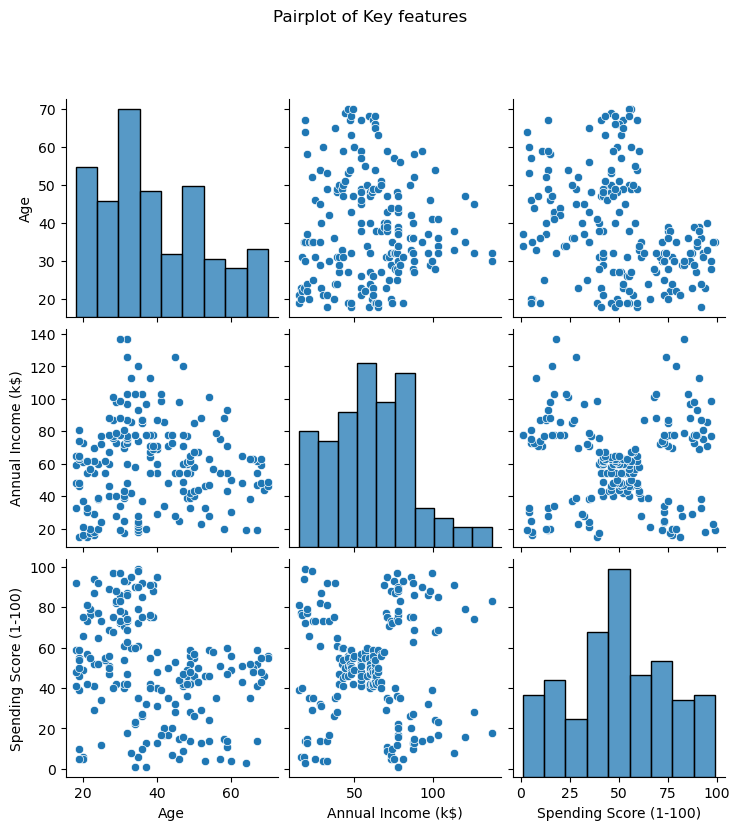

In [10]:
# Basic Pairplot
sns.pairplot(X)
plt.suptitle("Pairplot of Key features", y=1.1)
plt.show()

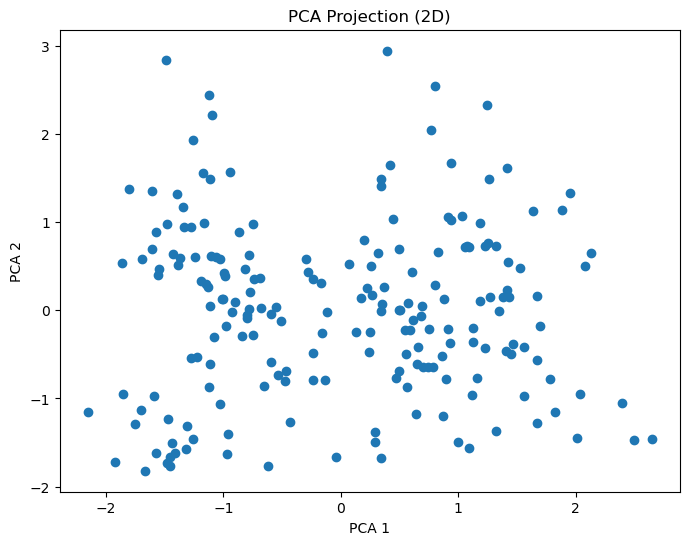

In [11]:
# PCA for 2D Visualization
# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA Projection (2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [12]:
# Fit K-Means and Assign Cluster Labels
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

In [13]:
# Show cluster sizes
print(df['Cluster'].value_counts())

Cluster
0    58
3    45
1    40
4    31
2    26
Name: count, dtype: int64


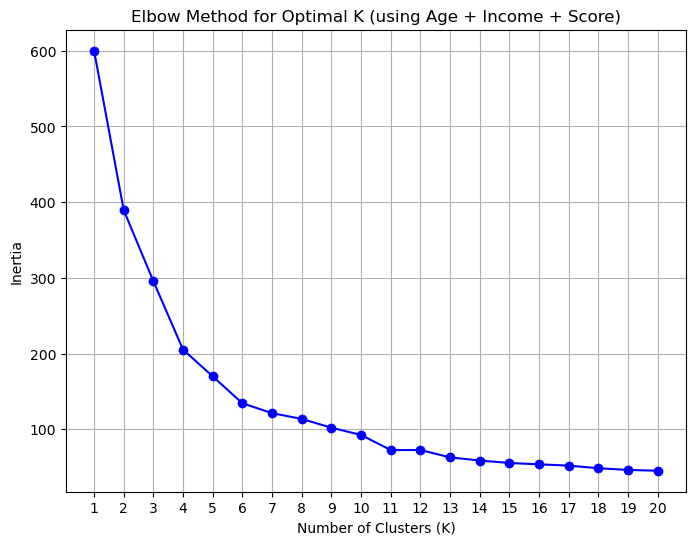

In [14]:
# Use the Elbow Method to Find Optimal K

inertia = []
k_range = range(1, 21)

for k in k_range:
    model = KMeans(n_clusters=k, init='k-means++', random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K (using Age + Income + Score)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

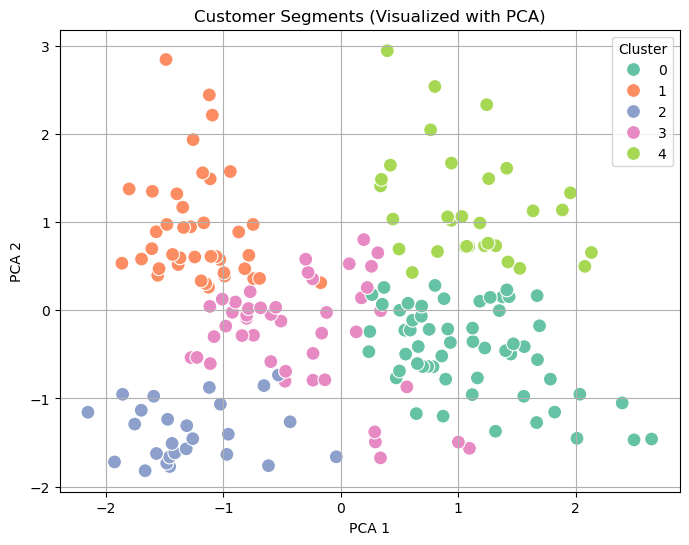

In [15]:
# Visualize Clusters with Color-Coding (2D via PCA)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set2', s=100)
plt.title('Customer Segments (Visualized with PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [16]:
# Evaluate Clustering using Silhouette Score

score = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score: {score:}')

Silhouette Score: 0.40846873777345605
